In [1]:
!pip install missingno

In [2]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Model
import multiprocessing
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set max columns
pd.set_option('display.max_columns', None)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# E-commerce Customer Churn: Predicting Customer Churn

Created By Christianto Kurniawan Priyono

# Business Understanding

## Project Background

Fenomena churn pelanggan dalam industri e-commerce, yang mencerminkan kehilangan pelanggan setelah transaksi atau pengalaman negatif, telah menjadi permasalahan serius yang mempengaruhi perusahaan di seluruh dunia. Dampaknya terlihat melalui penuruan pendapatan yang signifikan, dan penelitian menunjukkan bahwa peningkatan retensi pelanggan sebesar 5% dapat menghasilkan kenaikan keuntungan yang substansial.<br>
Persaingan yang sengit di pasar global e-commerce memperkuat pentingnya menjaga pelanggan dengan fokus pada peningkatan pengalaman dan retensi. Kualitas layanan, harga kompetitif, dan kebijakan pengembalian yang efisien menjadi faktor utama, sementara perubahan preferensi konsumen dan ekspektasi yang tinggi menambahkan kompleksitas. <br>
Untuk mengatasi tantangan ini, perusahaan e-commerce semakin mengandalkan teknologi seperti machine learning untuk membangun model prediksi yang mengidentifikasi pelanggan beresiko churn, memungkinkan mereka mengembangkan strategi retensi yang efektif berdasarkan data pelanggan historis, transaksi, dan umpan balik *(feedback)*. Pemahaman yang mendalam tentang churn dan respons proaktif menjadi kunci bagi perusahaan e-commerce untuk menjaga keberlanjutan dan kompetitivitas di pasar yang terus berkembang.

## Problem Statement

Dalam sebuah perusahaan, tingkat churn yang tinggi adalah indikator kegagalan dalam menjaga pelanggan dalam bisnis E-Commerce. Ketika churn rate mencapai 5% artinya perusahaan akan kehilangan 5% dari pelanggan mereka. Oleh karena itu, sangat penting bagi perusahaan untuk berusaha mengurangi churn rate ini sekecil mungkin. Karena, mencari dan mendapatkan pelanggan baru memerlukan investasi yang lebih besar dibandingkan dengan menjaga pelanggan yang sudah ada. <br>
Sebagai contoh, apabila perusahaan menghabiskan 100 dollars perbulan untuk mendapatkan pelanggan baru dan biaya per pelanggan per bulan sebesar 50 dollars, maka perusahaan harus memastikan setidaknya 2 pelanggan yang tetap bertahan setiap bulannya untuk menutupi biaya tersebut. [Sumber](https://www.woopra.com/blog/churn-rate-vs-retention-rate)
<br>

Berdasarkan project background diatas, Bagaimana perusahaan dapat secara efektif mengidentifikasi pelanggan yang beresiko churn dengan menggunakan data historis, transaksi dan umpan balik pelanggan?

## Goals

Dalam rangka mengatasi permasalahan *churn* pelanggan. Perusahaan memiliki tujuan yaitu mengurangi tingkat churn pelanggan dalam bisnis *e-commerce* menjadi sekecil mungkin, dengan fokus pada menciptakan strategi retensi yang efektif.

## Solution Statement

Untuk mengatasi permasalahan churn pelanggan dalam bisnis e-commerce dan mencapai tujuan yang telah ditetapkan. Berikut langkah-langkah dalam solution statement:
* Pengumpulan data yang relevan
  <br> Mengumpulkan dan mengintegrasikan data yang relevan dan berkualitas tinggi untuk digunakan sebagai dasar untuk analisis dan prediksi churn
* Pengembangan model machine learning.
  <br> Menggunakan algoritma machine learning seperti Regresi Logistik, Random Forest dll untuk mengembangkan model prediksi churn pada pelanggan masa depan.

## Metric Evaluation

Target utama dalam masalah ini adalah pelanggan yang berhenti berlangganan (Churn).

<br>

**False Positive:** Pelanggan yang aktualnya tidak tapi diprediksi churn
<br> **Konsekuensi**: Tidak efektif dalam pemberian insentif

**False Negative:** Pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn
<br> **Konsekuensi:** Kehilangan Pelanggan.


<br>
Berdasarkan konsekuensi yang ada, akan dibuat model machine learning yang akan mengurangi resiko kehilangan pelanggan karena untuk mendapatkan pelanggan baru membutuhkan biaya lebih banyak. Kita ingin recall dan precision seimbang sehingga digunakan metric f1_score

# Data Understanding

## Attribute Information

Dataset Source: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

| Attribute        | Data Type        | Description  |
|------------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
CustomerID              | Int   | Unique customer ID	|
Churn                   | Int | Churn Flag 0 : Tidak Churn, 1 : Churn |
Tenure                  | Float | Tenure of customer in organization |
PreferredLoginDevice    | Text | Preferred login device of customer |
CityTier                | Int | City tier |
WarehouseToHome         | Float | Distance in between warehouse to home of customer	 |
PreferredPaymentMode    | Text | Preferred payment method of customery |
Gender                  | Text    | Gender of Customer |
HourSpendOnApp          | Float | Number of hours spend on mobile application or website |
NumberOfDeviceRegistered | Int | Total number of added added on particular customer  |
PreferedOrderCat   | Object | Preferred order category of customer in last month |
SatisfactionScore   | Int | Satisfactory score of customer on service |
MaritalStatus   | Object | Marital status of customer |
NumberOfAddress   | Int | Total number of added added on particular customer |
Complain   | Int | 	Any complaint has been raised in last month |
OrderAmountHikeFromlastYear  | Float | Percentage increases in order from last year |
CouponUsed   | Float | Total number of coupon has been used in last month |
OrderCount   | Float | Total number of orders has been places in last month |
DaySinceLastOrder | Float | Day Since last order by customer |
CashbackAmount | Float | Average cashback in last month |

In [4]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/Portfolio/machine_learning/dicoding_submisson_predictive_analytics/E-Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
# Mengetahui info tentang dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Dari data diatas, terlihat bahwa terdapat 5630 baris dan 20 kolom


In [6]:
# Check description dataset
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Terdapat missing kolom pada dataset karena pada kolom "min" terdapat nilai 0.

# Exploratory Data Analysis

## Checking Unique Values (EDA)

Tujuan dari langkah ini adalah untuk mengidentifikasi dan memahami variasi nilai yang ada dalam satu set data.

In [7]:
# Checking Value Dataset
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum() / len(df[col])) * 100, 2),
                     df[col].nunique(), list(df[col].unique())])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,CustomerID,int64,0,0.00,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,int64,0,0.00,2,"[1, 0]"
2,Tenure,float64,264,4.69,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,object,0,0.00,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,0,0.00,3,"[3, 1, 2]"
5,WarehouseToHome,float64,251,4.46,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,0,0.00,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,object,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,255,4.53,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 4, 5, 2, 1, 6]"


Dari data diatas, dataset mempunyai 264 missing value pada kolom `tenure`, 251 missing value pada kolom `WarehouseToHome`, 255 missing value pada kolom `HourSpendOnApp`, 265 pada kolom `OrderAmountHikeFromlastYear`, 256 pada kolom `CouponUsed`, 258 pada kolom `OrderCount`, dan 307 pada kolom `DaySinceLastOrder`.

**PreferedOrderCat**

Kemudian kita check unique values pada kolom PrederedOrderCat, jika mempunyai value yang sama maka akan kita sederhanakan.

In [8]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

Terdapat value yang sama antara Mobile Phone dengan Mobile, maka akan kita jadikan satu menjadi Mobile Phone

In [9]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

**PreferredPaymentMode**

Kemudian kita check unique values pada kolom PreferredPaymentMode, jika mempunyai value yang sama maka akan kita sederhanakan.

In [10]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

Terdapat value yang sama antara CC dengan Credit Card dan COD dengan Cash on Delivery, maka akan kita jadikan satu CC menjadi Credit Card dan COD menjadi Cash on Delivery

In [11]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'COD':'Cash on Delivery'})
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

**PreferredLoginDevice**

Kemudian kita check unique values pada kolom PreferredPaymentMode, jika mempunyai value yang sama maka akan kita sederhanakan.

In [12]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

Terdapat value yang sama antara Mobile Phone dengan Phone, maka akan kita jadikan satu menjadi Mobile Phone

In [13]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

## Checking Correlation

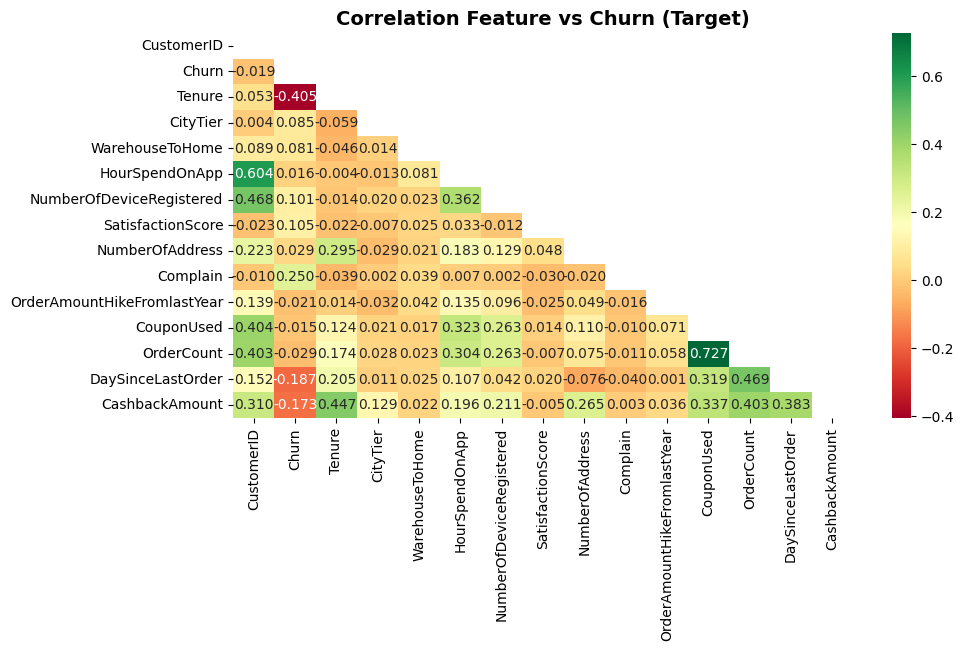

In [14]:
corr = df.corr('spearman') # menggunakan spearman karena tidak check distribusi normal atau tidak.
plt.figure(figsize=(10,5))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Correlation Feature vs Churn (Target)', size=14, weight='bold');

## Handling

### Handling Columns

Karena Column Customer_ID tidak digunakan, maka akan kita hapus saja

In [15]:
# menghapus kolom CustomerID
df.drop(columns='CustomerID', inplace=True)

# check info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Handling Duplicate Value

Terdapat beberapa tujuan dari proses ini, yaitu:
* Memastikan kualitas data <br>
  Duplikasi data dapat menyebabkan bias dan mengganggu hasil analisis yang akurat.
* Menghindari Perkiraan Berlebihan <br>
  Jika data ini tidak ditangani, perkiraan atau statistik yang didasarkan pada data tersebut dapat menjadi terlalu berlebihan. Ini dapat menghasilkan evaluasi yang tidak akurat dalam berbagai konteks.

In [16]:
# Number of Dulicate Data
df.duplicated().sum()

557

In [17]:
# Percentage of Duplicate Data
duplicate_percentage = (df.duplicated().sum() / len(df)) * 100
duplicate_percentage

9.893428063943162

Pada dataset kita terdapat 556 data duplicate atau 9.87%. Maka langkah selanjutnya kita akan menghapus data duplicate tersebut.

In [18]:
# Handling Dupliacate by Deleting
df.drop_duplicates(inplace=True)

# Checking Duplicate After Handling
df.duplicated().sum()

0

### Handling Missing Value

Tujuan dari mengatasi nilai yang hilang adalah sebagai berikut:
* Memastikan Kualitas Data <br>
  Data yang hilang dapat menyebabkan bias dan menganggu hasil analisis yang akurat
* Menghindari Kesalahan Analisis <br>
  Nilai yang hilang dapat mengakibatkan kesalahan dalam analisis data, seperti perhitungan yang salah atau penarikan kesimpulan yang tidak tepat.

<Axes: >

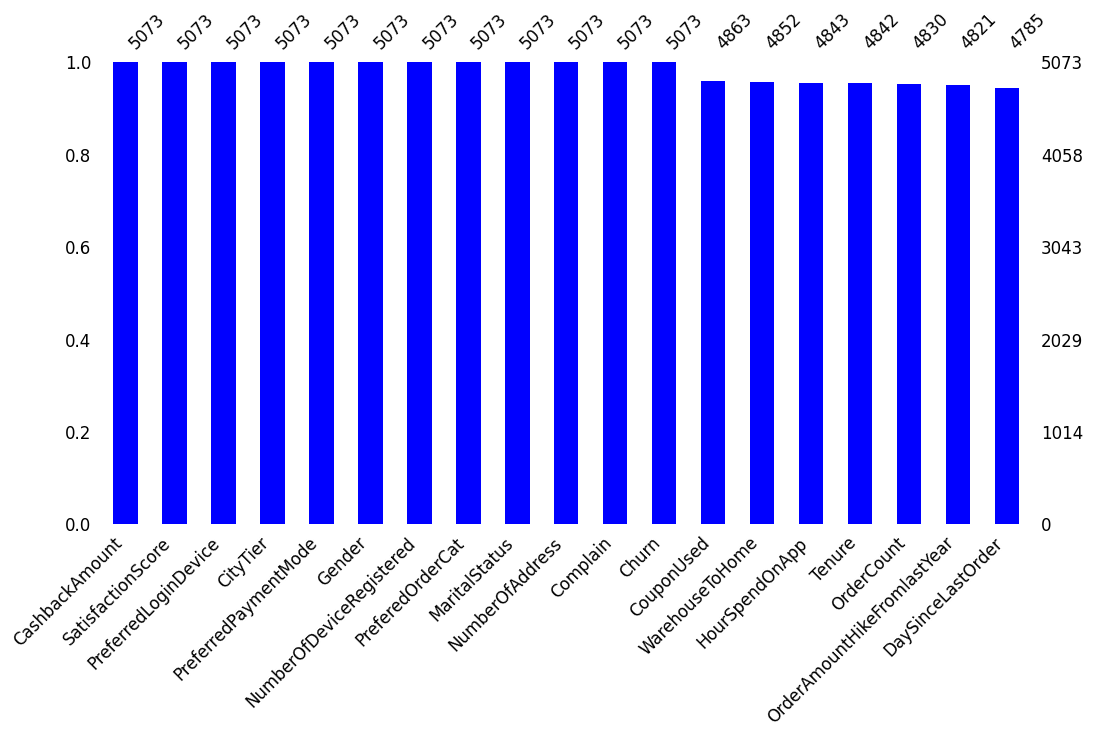

In [19]:
missingno.bar(df, sort="descending", figsize=(12,6), fontsize=12, color='blue')

In [20]:
# Check missing value
df.isna().sum()/len(df)*100

Churn                          0.000000
Tenure                         4.553519
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.356397
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.533806
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.967475
CouponUsed                     4.139562
OrderCount                     4.790065
DaySinceLastOrder              5.677114
CashbackAmount                 0.000000
dtype: float64

Missing value pada data hanya sebesar 4.5% - 5.4% dari total keseluruhan data. Sehingga data ini akan di delete (karena menurut beberapa sumber, maksimal penghapusan data hanya 10% dari total dataset).

In [21]:
# Hapus missing kolom
df.dropna(inplace= True)

# Check missing value
df.isna().sum()/len(df)*100

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

### Handling Outliers

Pertama kita check outliers yang terdapat pada feature numerik.

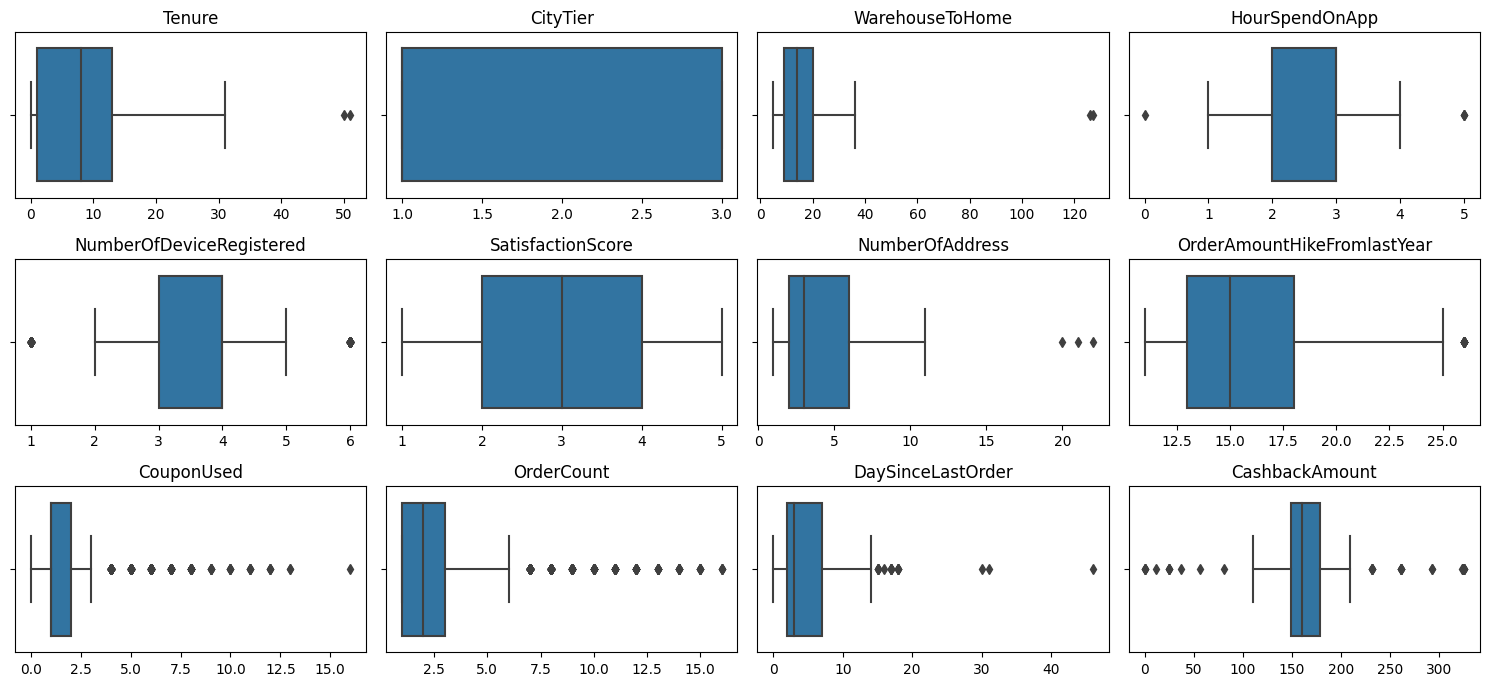

In [22]:
num_feature = [fea for fea in df.describe().columns if fea not in ['Churn', 'Complain']]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

Akan dilakukan handling outlier menggunakan metode IQR *(Inter Quartile Range)*

In [23]:
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

In [24]:
# delete outliers in numerical feature kecuali churn dan complain
for feature in num_feature:
    if feature not in ['Churn', 'Complain']:
        df = df[~(detect_outliers(df[feature]))]

df.shape

(2354, 19)

## Unvariate Analysis

In [25]:
# membagi dataset menjadi dua bagian
cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

### Categorical Features

Fitur **PreferredLoginDevice**

              jumlah sampel  persentase
Mobile Phone           1681        71.4
Computer                673        28.6


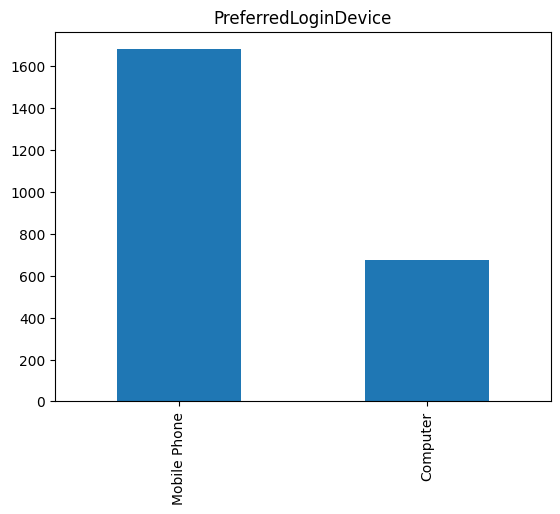

In [26]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_visualization = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_visualization)
count.plot(kind='bar', title=feature);

Dari tabel diatas, dapat kita ketahui bahwa mayoritas pelanggan, sekitar 71.4% lebih memilih "Mobile Phone" sebagai perangkat utama mereka untuk login, sementara 28.6% lainnya lebih cenderung menggunakan "Computer" untuk perangkat preferensi. Temuan ini mengindikasikan dominasi penggunaan perangkat mobile dalam mengakses platform e-commerce.<br>

Tren ini dapat menjadi pedoman berharga bagi perusahaan e-commerce dalam merancang strategi bisnis. Mereka dapat memprioritaskan pengoptimalan pelanggan di perangkat mobile. Dengan demikian, mereka dapat meningkatkan kepuasan pelanggan yang lebih cenderung menggunakan perangkat mobile untuk belanja online. Data ini juga memberikan peluang untuk mengarahkan strategi pemasaran yang lebih terforkus. <br>

Namun, penting juga untuk terus memantau dan menganalisis tren ini seiring berjalannyua waktu karena preferensi pelanggan dapat berubah.

                  jumlah sampel  persentase
Debit Card                  967        41.1
Credit Card                 708        30.1
E wallet                    285        12.1
Cash on Delivery            213         9.0
UPI                         181         7.7


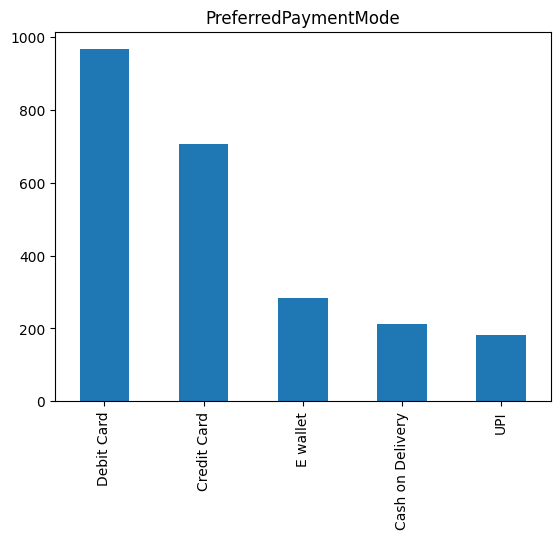

In [27]:
feature = cat_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_visualization = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_visualization)
count.plot(kind='bar', title=feature);

Metode pembayaran yang paling dominan adalah "Debit Card" sekitar 41.1% dari total pelanggan memilih metode ini. "Credit Card" juga cukup populer, digunakan oleh sekitar 30.1% pelanggan. Sementara itu, metode pembayaran lain seperti "E-Wallet", "Cash on Delivery", dan "UPI" digunakan oleh persentase pelanggan yang lebih kecil, masing-masing sekitar 12.1%, 9.0%, 7.7% <br>

Metode pembayaran non-tunai seperti kartu debit, kredit dan E-Wallet lebih disukai daripada pembayaran tunai (Cash on Delivery). Perusahaan e-commerce dapat menggunakan informasi ini untuk menyusun strategi pembayaran yang lebih efisien, termasuk penawaran promosi khusus untuk pengguna kartu debit atau kredit. <br>

Namun, perlu juga diperhatikan bahwa metode pembayaran tunai seperti "Cash on Delivery" masih digunakan oleh sebagian pelanggan. Oleh karena itu, perusahaan perlu menjaga fleksibilitas dalam penawaran metode pembayaran dan memastikan bahwa pelanggan yang menggunakan metode ini juga mendapatkan pengalaman yang baik dan aman saat berbelanja online.

        jumlah sampel  persentase
Male             1429        60.7
Female            925        39.3


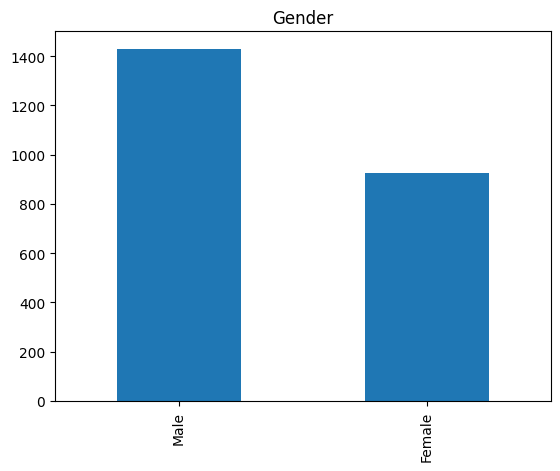

In [28]:
feature = cat_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_visualization = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_visualization)
count.plot(kind='bar', title=feature);

Terlihat bahwa mayoritas pelanggan, sekitar 60.7%, adalah pelanggan dengan jenis kelamin "Male" (pria), sementara sekitar 39.3% lainnya adalah pelanggan dengan jenis kelamin "Female" (wanita).

                    jumlah sampel  persentase
Laptop & Accessory           1183        50.3
Mobile Phone                  967        41.1
Fashion                       204         8.7


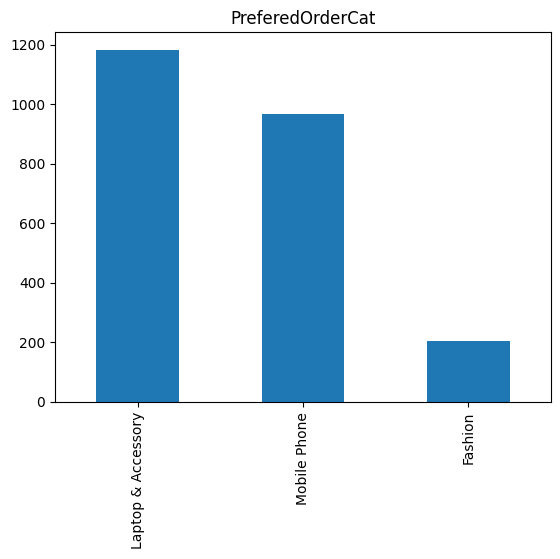

In [29]:
feature = cat_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_visualization = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_visualization)
count.plot(kind='bar', title=feature);

Terlihat bahwa mayoritas pelanggan, sekitar 50.3%, lebih memilih untuk berbelanja dalam kategori "Laptop & Accessory" (laptop dan aksesorinya). Sementara itu, sekitar 41.1% pelanggan lebih suka berbelanja dalam kategori "Mobile Phone" (telepon seluler), dan sekitar 8.7% lainnya memilih kategori "Fashion" (mode).

          jumlah sampel  persentase
Married            1174        49.9
Single              800        34.0
Divorced            380        16.1


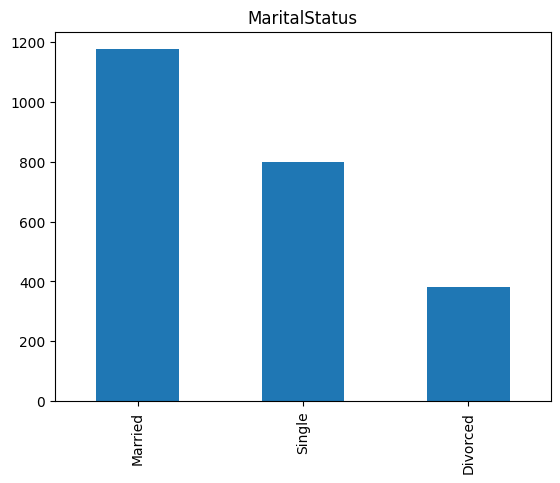

In [30]:
feature = cat_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_visualization = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_visualization)
count.plot(kind='bar', title=feature);

Terlihat bahwa mayoritas pelanggan, sekitar 49.9%, adalah pelanggan yang berstatus "Married" (menikah). Kemudian sekitar 34.0% pelanggan adalah "Single" (single/tidak menikah), dan sekitar 16.1% pelanggan merupakan pelanggan yang "Divorced" (bercerai).

### Numerical Features

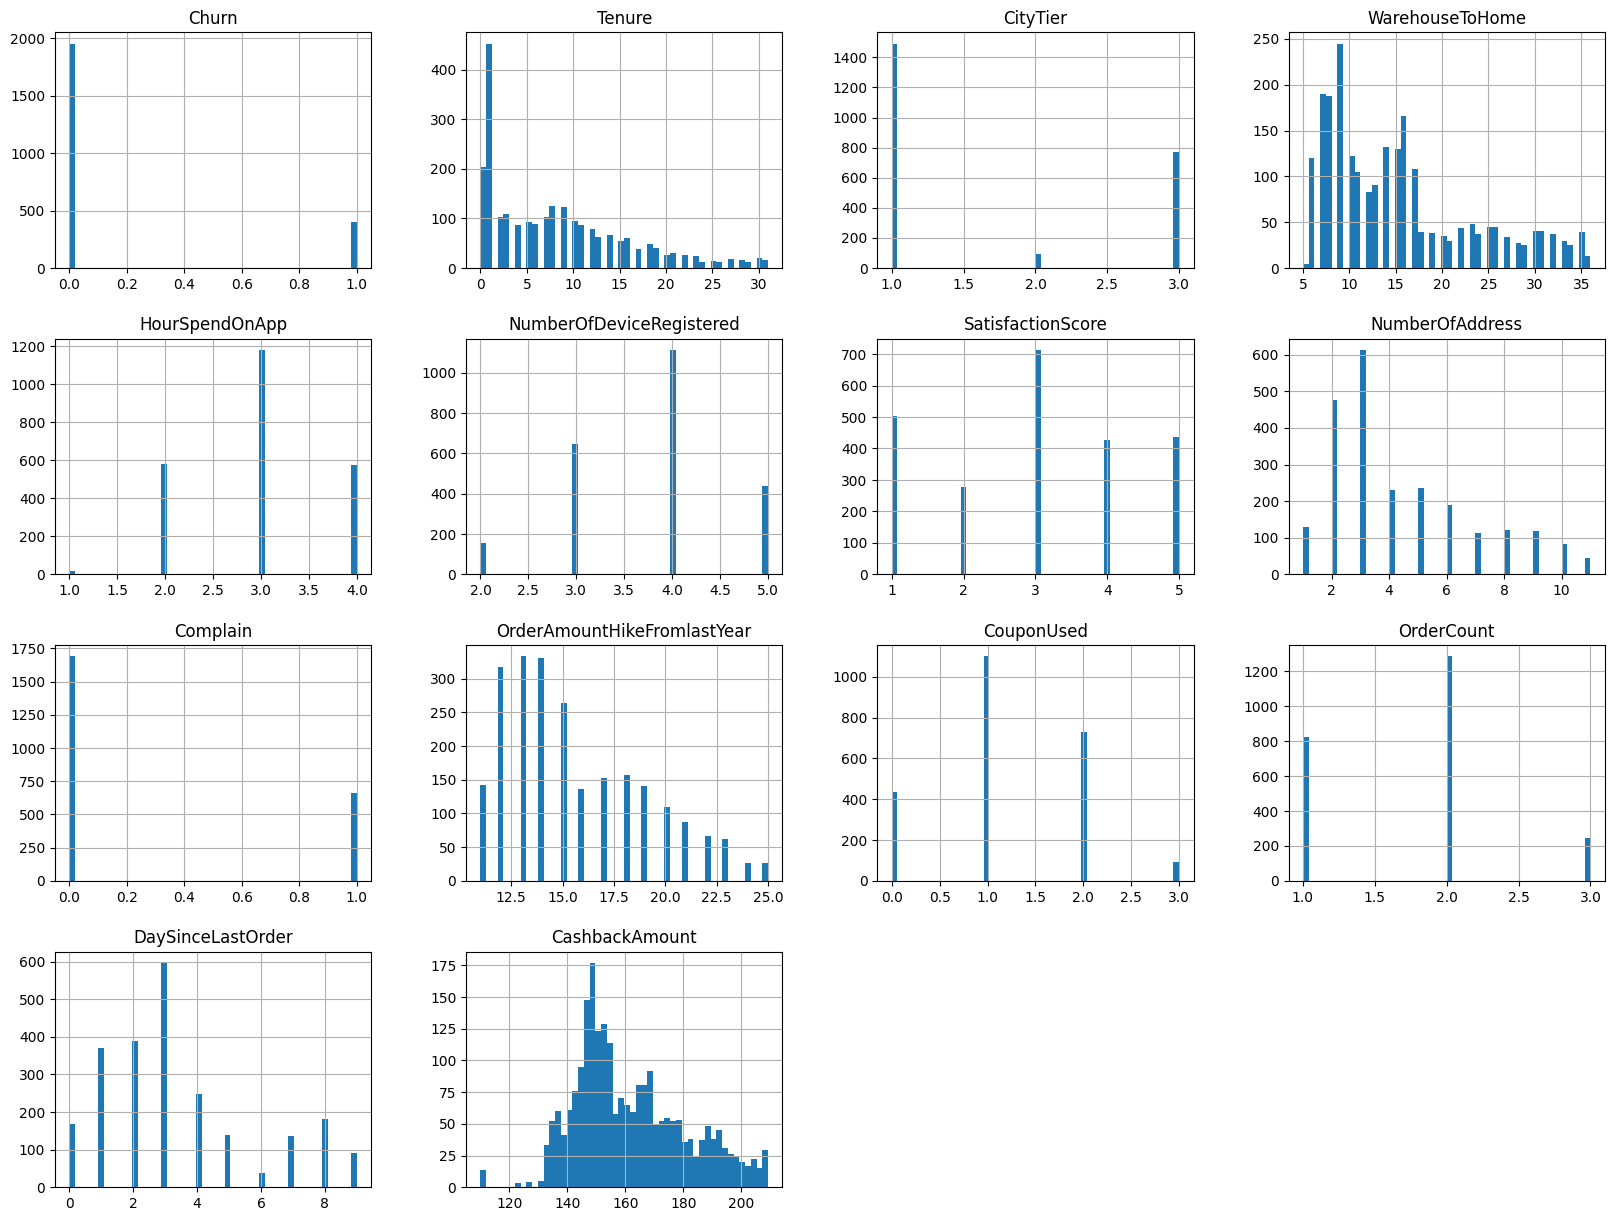

In [31]:
# histogram masing-masing fitur pada dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari visualisasi diatas, dapat dilihat bahwa rata-rata distribusi pada kolom numerical yaitu *right-skewed* (miring ke kanan)

## Checking Data Proportion

In [32]:
# Check data proportion using value_counts
df['Churn'].value_counts()

0    1954
1     400
Name: Churn, dtype: int64

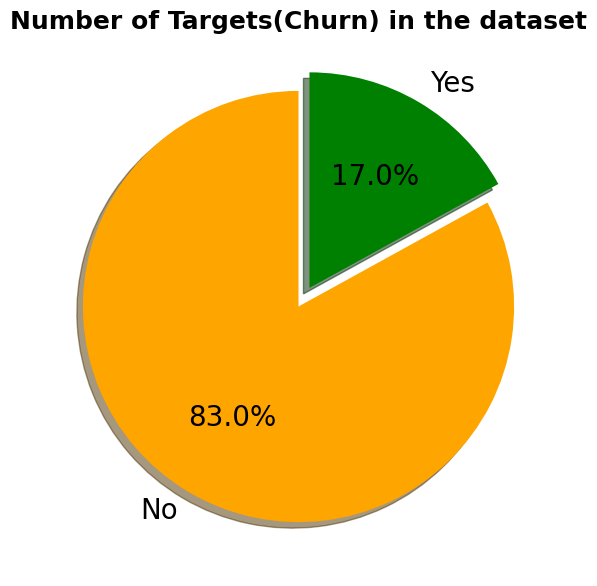

In [33]:
# Visualization
plt.figure(figsize=(7,7))
plt.title("Number of Targets(Churn) in the dataset", size=18, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), labels=['No', 'Yes'], colors=["orange","green"], autopct='%1.1f%%', shadow=True,
        startangle=90, textprops={"fontsize":20})

plt.show()

Dari visualisasi diatas, kelas 0 (Tidak Churn) memiliki jumlah sampel yang jauh lebih banyak (83%) daripada kelas 1 (Churn) 17%.

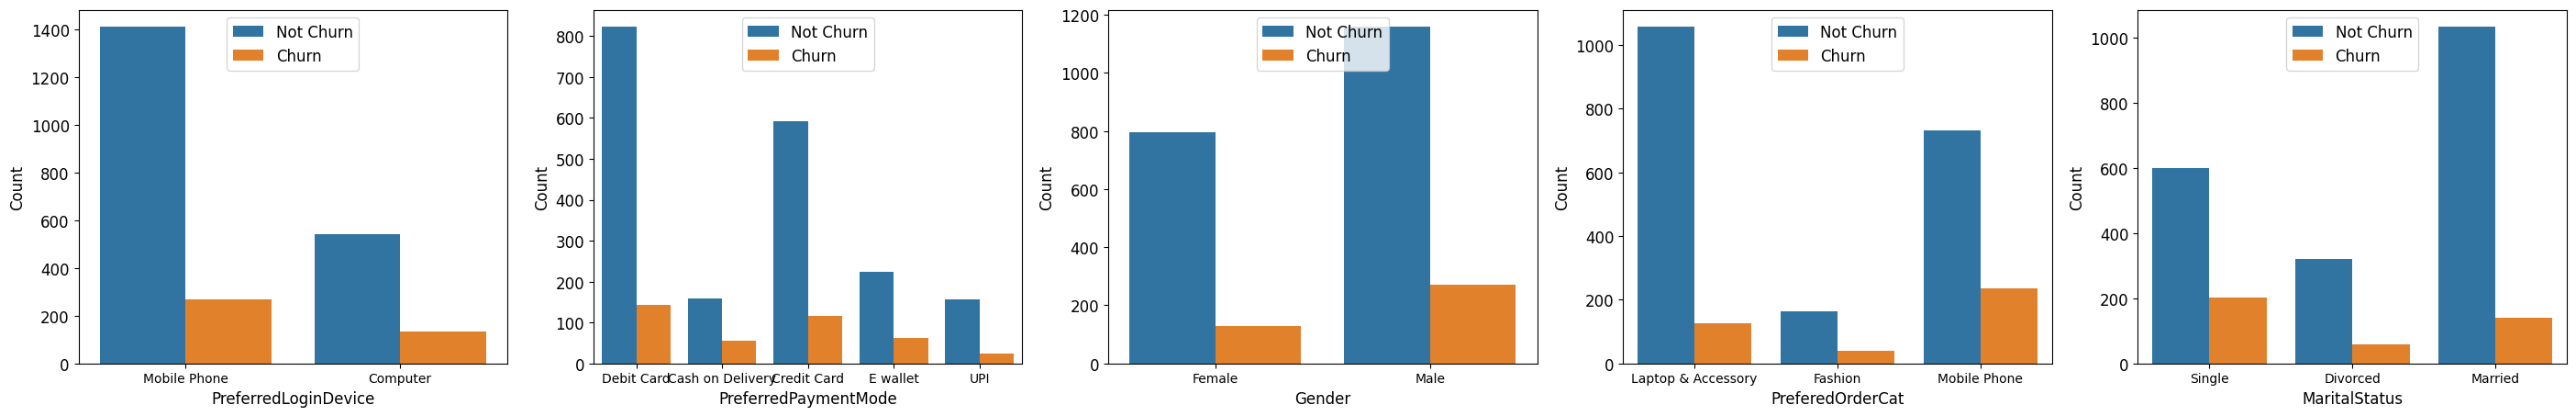

In [34]:
# Membuat visualisasi untuk melihat variable categori terhadap target(churn)
fig, ax = plt.subplots(1, 5, figsize=(35, 5))
for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax[i])
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].tick_params(axis='x', labelsize=10)
    ax[i].legend(['Not Churn', 'Churn'], loc='upper center', fontsize=12)
    ax[i].tick_params(axis='y', labelsize=12)

Dapat diketahui bahwa:
* Pada kolom `PrefferedLoginDevice` Pelanggan yang menggunakan *Mobile Phone* lebih banyak melakukan *churn* daripada menggunakan komputer
* Pada kolom `PreferredPaymentMode` Pelanggan yang menggunakan *Debit Card* atau *Credit Card* lebih banyak melakukan *churn*
* Pada kolom `Gender` dapat dilihat bahwa pelanggan laki-laki cenderung melakukan *churn* daripada perempuan
* Pada kolom `PreferedOrderCat` dapat dilihat bahwa kategori *Fashion* memiliki jumlah pelanggan yang lebih sedikit, namun memiliki tingkat churn yang relatif lebih tinggi, dengan 39 pelanggan yang melakukan churn dari total 165 pelanggan
* Pada kolom `MaritalStatus` dapat dilihat bahwa pelanggan dengan status pernikahan "Single" cenderung lebih mungkin untuk melakukan churn dibandingkan dengan pelanggan dalam status pernikahan lainnya,

# Data Preparation

## Splitting

In [35]:
# Define dependent variable as target / label of prediction
y = df['Churn']

# Define independent variable as feature
x = df.drop(columns = ['Churn'], axis=1)

# Split Dataset for Training (80%) and Testing (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1,
    stratify=y
) # 0.2 is 20% of the data as a tester  |  1 just for random | stratify for sampe proportion y

Tujuan proses splitting: <br>
* Pemisahan dataset menjadi data pelatihan (training) dan data pengujian (testing) adalah langkah penting dalam pengembangan model prediktif. Ini membantu dalam mengukur seberapa baik model yang dihasilkan akan berkinerja pada data yang belum pernah dilihat sebelumnya.
* Pembagian data menjadi 80% untuk pelatihan dan 20% untuk pengujian adalah pilihan yang umum dan dapat membantu memastikan bahwa model yang dikembangkan memiliki pelatihan yang memadai dan juga diuji dengan baik pada data yang independen
* Random State ini digunakan untuk memastikan pembagian data menjadi pelatihan dan pengujian tetap konsisten setiap kode dijalankan.
* Stratify ini juga memastikan bahwa pembagian data tetap menjaga proporsi kelas target untuk mencegah bias dalam pengujian

## Encoding

Pada langkah ini, akan dilakukan encoding (mengubah categorical menjadi numeric) untuk fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding<br>
Variabel Kategori:
* PreferredLoginDevice,
* PreferredPaymentMode,
* Gender,
* PreferedOrderCat,
* MaritalStatus <br>


 One Hot Encoding mengubah setiap kategori menjadi variabel biner (0 atau 1), yang memungkinkan model untuk menganggap setiap kategori secara terpisah tanpa memberikan urutan atau hierarki yang salah.

In [36]:
# One Hot Encoding
one_hot_var = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
one_hot_encoder = OneHotEncoder()

# Combine preprocess in one table
preprocess= ColumnTransformer([
                                ('one_hot', one_hot_encoder, one_hot_var),
                                ], remainder='passthrough')

In [37]:
x_train

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5493,10.0,Mobile Phone,3,17.0,Debit Card,Female,4.0,4,Fashion,4,Married,7,0,22.0,2.0,2.0,8.0,198.14
2340,16.0,Mobile Phone,1,12.0,Credit Card,Female,3.0,4,Laptop & Accessory,3,Single,2,1,14.0,0.0,1.0,8.0,140.81
2222,19.0,Mobile Phone,1,8.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,1,Married,3,0,11.0,0.0,1.0,4.0,173.79
2030,0.0,Computer,3,6.0,Credit Card,Male,2.0,4,Laptop & Accessory,5,Single,2,0,12.0,0.0,1.0,7.0,142.94
3264,8.0,Mobile Phone,1,7.0,Debit Card,Female,4.0,2,Mobile Phone,2,Single,4,0,17.0,1.0,2.0,4.0,157.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,10.0,Mobile Phone,1,13.0,Debit Card,Female,3.0,2,Mobile Phone,1,Married,5,0,13.0,1.0,2.0,1.0,155.38
798,7.0,Computer,2,17.0,Debit Card,Male,2.0,4,Laptop & Accessory,4,Divorced,5,0,11.0,0.0,1.0,8.0,144.90
2545,17.0,Mobile Phone,2,7.0,Debit Card,Female,2.0,3,Mobile Phone,1,Married,5,1,18.0,2.0,2.0,2.0,131.95
1238,6.0,Mobile Phone,3,16.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Single,2,0,14.0,0.0,1.0,9.0,154.87


In [38]:
# Set the option to show all columns
pd.set_option('display.max_columns', None)

# Combine spliting data into preprocessing usin .fit_transform
x_train_prep = preprocess.fit_transform(x_train)
x_test_prep = preprocess.transform(x_test)

x_train_prep = pd.DataFrame(x_train_prep)
x_test_prep = pd.DataFrame(x_test_prep)

x_train_prep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,3.0,17.0,4.0,4.0,4.0,7.0,0.0,22.0,2.0,2.0,8.0,198.14
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,8.0,140.81
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,1.0,8.0,2.0,3.0,1.0,3.0,0.0,11.0,0.0,1.0,4.0,173.79
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,2.0,4.0,5.0,2.0,0.0,12.0,0.0,1.0,7.0,142.94
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,1.0,7.0,4.0,2.0,2.0,4.0,0.0,17.0,1.0,2.0,4.0,157.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,1.0,13.0,3.0,2.0,1.0,5.0,0.0,13.0,1.0,2.0,1.0,155.38
1879,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0,17.0,2.0,4.0,4.0,5.0,0.0,11.0,0.0,1.0,8.0,144.90
1880,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,2.0,7.0,2.0,3.0,1.0,5.0,1.0,18.0,2.0,2.0,2.0,131.95
1881,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,3.0,16.0,2.0,3.0,3.0,2.0,0.0,14.0,0.0,1.0,9.0,154.87


In [39]:
# Getting Feature Names from one_hot_encoding
name_one_hot = list(preprocess.transformers_[0][1].get_feature_names_out())

# Adjust sequence in naming based on ColumnTransformer
feature_names = name_one_hot + ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
feature_names

['PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_Cash on Delivery',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'Gender_Female',
 'Gender_Male',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [40]:
# Input feature_names into x_train/test_preprocess
x_train_prep.columns = feature_names
x_test_prep.columns = feature_names

x_train_prep

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,3.0,17.0,4.0,4.0,4.0,7.0,0.0,22.0,2.0,2.0,8.0,198.14
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16.0,1.0,12.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,8.0,140.81
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,1.0,8.0,2.0,3.0,1.0,3.0,0.0,11.0,0.0,1.0,4.0,173.79
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,2.0,4.0,5.0,2.0,0.0,12.0,0.0,1.0,7.0,142.94
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0,1.0,7.0,4.0,2.0,2.0,4.0,0.0,17.0,1.0,2.0,4.0,157.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,1.0,13.0,3.0,2.0,1.0,5.0,0.0,13.0,1.0,2.0,1.0,155.38
1879,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0,17.0,2.0,4.0,4.0,5.0,0.0,11.0,0.0,1.0,8.0,144.90
1880,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,17.0,2.0,7.0,2.0,3.0,1.0,5.0,1.0,18.0,2.0,2.0,2.0,131.95
1881,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,3.0,16.0,2.0,3.0,3.0,2.0,0.0,14.0,0.0,1.0,9.0,154.87


# Modeling

Telah diketahui bahwa tujuan dari model adalah untuk memprediksi customer churn, maka model yang digunakan adalah klasifikasi. Dan hal-hal yang perlu dipertimbangkan adalah data bersifat imbalance dan range valuenya sangat beragam. maka data perlu dipertimbangkan untuk dilakukan perlakuan data imbalance dan scale.

Model yang dicoba:
- *K-Nearest Neighbors* (KNN)
- *Random Forest Classifier*
- *AdaBoost Classifier*

In [41]:
# Dataframe untuk analisis model
models = pd.DataFrame(index=['train_f1_score', 'test_f1_score'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

### KNN

*K-Nearest Neighbors* (KNN) <br>
Mengukur jarak antara instance baru dan instance tetangganya untuk menentukan kelasnya. <br>
Kekurangan: <br>
*  Sensitif terhadap pemilihan parameter k (jumlah tetangga yang akan digunakan).
*  Mahal secara komputasi saat digunakan pada dataset besar.
*  Tidak memahami hubungan antar fitur atau pentingnya fitur tertentu. <br>

Kelebihan: <br>
*  Sederhana dan mudah dimengerti.
*  Cocok untuk dataset dengan pola kelas yang tidak teratur.

In [42]:
# Menggunakan algoritma KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_prep, y_train)

models.loc['train_f1_score','knn'] = f1_score(y_pred = knn.predict(x_train_prep), y_true=y_train)



```
# This is formatted as code
```



Parameters:
- *n_neighbors* merupakan parameter yang mengacu pada jumlah tetangga terdekat yang akan digunakan oleh model untuk membuat prediksi atau melakukan klasifikasi pada data baru. Dengan kata lain, *n_neighbors* menentukan berapa banyak titik data terdekat yang akan dipertimbangkan oleh model ketika mencoba memprediksi label atau nilai target dari data yang belum pernah dilihat sebelumnya.

### Random Forest

*Random Forest Classifier*
Menciptakan "hutan" pohon keputusan, dimana setiap pohon secara independen memprediksi kelas instance, Prediksi akhir dibuat dengan voting mayoritas. <br>
Kekurangan:
* Sulit untuk diinterpretasi dibandingkan dengan pohon keputusan tunggal.
* Memerlukan lebih banyak sumber daya komputasi daripada pohon keputusan tunggal.
  
Kelebihan: <br>
* Mengurangi overfitting dengan menggabungkan hasil dari banyak pohon keputusan.
* Mampu menangani dataset dengan banyak fitur dan kelas.
* Cocok untuk masalah klasifikasi dan regresi.

In [43]:
# Menggunakan algoritma RandomForest
rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(x_train_prep, y_train)

models.loc['train_f1_score','RandomForest'] = f1_score(y_pred=rf.predict(x_train_prep), y_true=y_train)

Parameters:
- *n_estimators* merupakan jumlah pohon keputusan yang akan digunakan dalam *ensemble* Random Forest. Semakin banyak pohon yang digunakan, semakin kuat kemampuan generalisasi model, tapi juga semakin besar komputeasi yang diperlukan.
- *max_depth* mengontrol kedalaman maksimum setiap pohon keputusan dalam ensemble. Ini merupakan cara untuk mencegah overfitting. Semakin dalam pohon, semakin rumit modelnya yang menyebabkan overfitting pada data pelatihan.
- *random_state* merupakan seed untuk generator angka acak. Pengaturan *random_state* memastikan bahwa pengacakan data yang digunakan dalam pembuatan setiap pohon tetap konsisten, sehingga Anda dapat mendapatkan hasil yang dapat direproduksi.
- *n_jobs* untuk mengontrol berapa banyak pekerjaan paralel yang akan dijalankan saat melatih model.

### AdaBoost Classifier

*AdaBoost Classifier* <br>
Secara iteratif melatih pengklasifikasi yang lemah pada subset data yang berbeda, memberi bobot lebih pada instance yang salah klasifikasi di setiap iterasi. Prediksi akhir dibuat dengan menggabungkan prediksi dari semua pengklarifikasi dengan bobot telah diberikan untuk kinerja yang lebih kuat <br>
Kekurangan: <br>
 * Rentan terhadap noise dan outlier dalam data pelatihan.
 * Kinerja dapat terpengaruh jika pengklasifikasi lemah tidak baik atau terlalu kompleks.
 * Memerlukan penyetelan parameter yang hati-hati.

Kelebihan: <br>
 * Meningkatkan kinerja model dengan menggabungkan pengklasifikasi lemah.
 * Dapat digunakan dengan berbagai algoritma pengklasifikasi lemah.
 * Cenderung mengurangi overfitting.

In [44]:
# Menggunakan algoritma Boosting Algorithm = AdaBoost
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boosting.fit(x_train_prep, y_train)

models.loc['train_f1_score','Boosting'] = f1_score(y_pred=boosting.predict(x_train_prep), y_true=y_train)

Parameter:
- *learning_rate* merupakan hyperparameter yang mengontrol seberapa besar langkah yang diambil dalam mengoreksi kesalahan model pada setiap iterasi atau langkah dalam algoritma boosting. Semakin kecil *learning_rate* semakin lambat model akan belajar, tapi ini jug abisa membantu mencegah overfitting. Begitu sebaliknya.
- *random_state* merupakan seed untuk generator angka acak. Pengaturan *random_state* memastikan bahwa pengacakan data yang digunakan dalam pembuatan setiap pohon tetap konsisten, sehingga Anda dapat mendapatkan hasil yang dapat direproduksi.

# Evaluation

In [45]:
# Create a DataFrame to store F1 scores for training and testing
f1_scores_df = pd.DataFrame(index=['train_f1_score', 'test_f1_score'], columns=['KNN', 'RandomForest', 'Boosting'])

# Create a dictionary for each algorithm used
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting}

# Calculate F1 scores on the training and testing data for each algorithm
for model_name, model in model_dict.items():
    f1_scores_df.loc['train_f1_score', model_name] = f1_score(y_true=y_train, y_pred=model.predict(x_train_prep))
    f1_scores_df.loc['test_f1_score', model_name] = f1_score(y_true=y_test, y_pred=model.predict(x_test_prep))

# Display the F1 scores DataFrame
f1_scores_df

,KNN,RandomForest,Boosting
train_f1_score,0.481876,1.0,0.239782
test_f1_score,0.386555,0.870748,0.177778


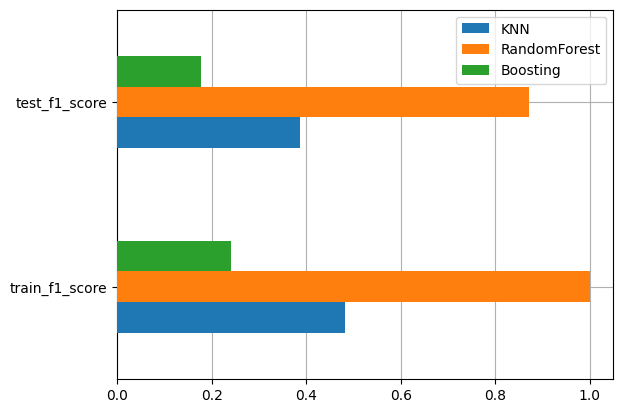

In [46]:
# Visualisasi dari tabel diatas
fig, ax = plt.subplots()
f1_scores_df.plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari tabel tersebut, dapat menarik beberapa insight yaitu:
- pada model KNN menunjukkan kinerja yang lebih baik pada data pelatihan daripada pada data uji, menunjukkan adanya overfitting.
- pada model Random Forest memiliki kinerja yang hampir sempurna pada data pelatihan, yang mungkin menunjukkan overfitting, tetapi kinerja yang sangat baik pada data uji, menunjukkan kemampuan generalisasi yang baik.
- pada model Boosting menunjukkan kinerja yang rendah pada kedua data pelatihan dan data uji, menunjukkan kesulitan dalam menyesuaikan diri dengan data pelatihan dan kurangnya kemampuan generalisasi.

Random Forest mungkin merupakan pilihan terbaik karena memiliki keseimbangan antara kinerja pada data pelatihan dan data uji, meskipun penting untuk melanjutkan evaluasi dan tuning untuk memastikan hasil yang optimal.

F1 Score merupakan metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi dengan cara memberikan keseimbangan antara Recall dan Presisi dan berguna dalam situasi dimana kita ingin meminimalkan false positive dan false negative secara seimbang. <br>

Semakin tinggi nilai F1 Score, semakin baik performa model dalam klasifikasi dengan nilai maksimum 1 yang menunjukkan performa sempurna